In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# read in data from h5py
file = h5py.File('results.hdf5', 'r')
names = [x[0] for x in file.items()]
values = [list(x[1]) for x in file.items()]
print(len(datasets))
file.close()

900


In [60]:
new_names = []
for n in names:
    nn = n.split()
    new_names.append((int(nn[1]), (float(nn[3]),float(nn[5])), float(nn[7]), float(nn[9])))

In [81]:
# key structure: (hwindow, (reward, wait_penalty), epsilon, discount_factor)
# value structure: (accuracy_score, purchase_fraction)
data = dict(zip(new_names, values))

In [72]:
hwindows = list(set([x[0][0] for x in data]))
rewards = list(set([x[0][1][0] for x in data]))
wait_penalties = list(set([x[0][1][1] for x in data]))
epsilons = list(set([x[0][2] for x in data]))
discount_factors = list(set([x[0][3] for x in data]))

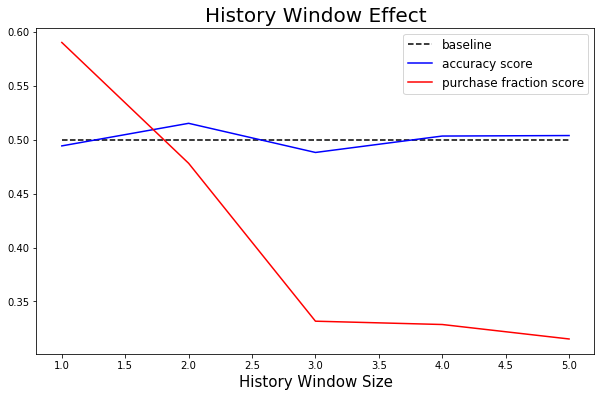

In [94]:
# Visualizations
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hwindows, [.5]*len(hwindows), 'k--',label='baseline')
ax.plot(hwindows, [data[(h, (1,-.1), .01, 1)][0] for h in hwindows], 'b-', label='accuracy score')
ax.plot(hwindows, [data[(h, (1,-.1), .01, 1)][1] for h in hwindows], 'r-', label='purchase fraction score') 
ax.set_xlabel('History Window Size', fontsize=15)
ax.set_title('History Window Effect', fontsize=20)
ax.legend(fontsize=12)